<a href="https://colab.research.google.com/github/saishdesai23/Loan-Interest-Prediction/blob/main/case_study_1_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study 1

## 1. Importing python libraries

In [1193]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Loading the data from a csv file into a pandas dataframe

In [1194]:
# importing the data set
loan_data = pd.read_csv("/content/loans_full_schema.csv")
loan_data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## 3. Describing the data set

In [1195]:
# Stats of the numerical variables in the dataframe
df1_transposed = loan_data.describe().T
df1_transposed = df1_transposed.reset_index()
df1_transposed.rename(columns={"index":"Column_name"}, inplace=True)

In [1196]:
# Describing the details of each column in a data frame
l1 = list(loan_data.columns)
l2 = list(loan_data.dtypes)
l3 = list(loan_data.isna().sum())
data_describe = pd.DataFrame(zip(l1,l2,l3),columns =['Column_name', 'Data_Type','Null_count'])
data_describe['isnull'] = np.where(data_describe['Null_count'] !=0,'T','F')
data_describe['Null_percent'] = round((data_describe['Null_count']*100)/len(loan_data),3)
data_describe['Non_num'] = np.where(data_describe['Data_Type'] =='object','T','F')
data_describe = data_describe.merge(df1_transposed, on='Column_name', how='left')
data_describe

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.000,10.0000,1.000000e+01
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_income,float64,0,F,0.00,F,10000.0,79222.148412,64734.290492,0.00,45000.0000,65000.000,95000.0000,2.300000e+06
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.570,25.0025,4.690900e+02
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.000,151545.5000,1.100000e+06
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.720,25.5000,3.998000e+01


In [1197]:
# listing columns with missing values
data_missing = data_describe[data_describe['isnull'] == 'T']
data_missing

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,emp_length,float64,817,T,8.17,F,9183.0,5.930306,3.703734,0.00,2.0000,6.00,10.0000,10.00
6,debt_to_income,float64,24,T,0.24,F,9976.0,19.308192,15.004851,0.00,11.0575,17.57,25.0025,469.09
7,annual_income_joint,float64,8505,T,85.05,F,1495.0,127914.571244,70168.375404,19200.00,86833.5000,113000.00,151545.5000,1100000.00
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,debt_to_income_joint,float64,8505,T,85.05,F,1495.0,19.979304,8.054781,0.32,14.1600,19.72,25.5000,39.98
11,months_since_last_delinq,float64,5658,T,56.58,F,4342.0,36.760709,21.634939,1.00,19.0000,34.00,53.0000,118.00
20,months_since_90d_late,float64,7715,T,77.15,F,2285.0,46.112473,21.748021,2.00,29.0000,47.00,63.0000,128.00
25,months_since_last_credit_inquiry,float64,1271,T,12.71,F,8729.0,7.340703,5.981590,0.00,2.0000,6.00,11.0000,24.00
27,num_accounts_120d_past_due,float64,318,T,3.18,F,9682.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00


In [1198]:
# listing columns with object datatype
data_object = data_describe[data_describe['Non_num'] == 'T']
data_object

,Column_name,Data_Type,Null_count,isnull,Null_percent,Non_num,count,mean,std,min,25%,50%,75%,max
0,emp_title,object,833,T,8.33,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,state,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,homeownership,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,verified_income,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,verification_income_joint,object,8545,T,85.45,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,loan_purpose,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,application_type,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,sub_grade,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,issue_month,object,0,F,0.00,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We describe the data by listing all the parameters and properties of the columns (predictors) in a separate dataframe.

The properties we describe for each column are


*   Data type
*   Null count
*   Null percent
*   Statistical parameters for numerical variables




## 4. Data Visualization


### 1. Visualizing the data for difference states within the United States. 

Here we have data pertaining to all the states within the United states except 'IOWA State'

annual_income


public_record_bankrupt


delinq_2y


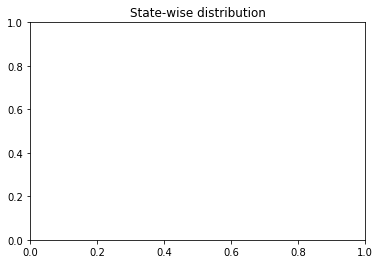

In [1200]:
loan_region = loan_data.groupby(['state']).mean().reset_index()
para = ['annual_income','public_record_bankrupt','delinq_2y']
for ele in para:
  print(ele)
  l = list(loan_region[ele])
  fig = px.choropleth(loan_region, color = list(loan_region[ele]),
                           locations=list(loan_region['state']),
                           locationmode="USA-states",
                           color_continuous_scale="Darkmint",
                           range_color=(min(l), max(l)),
                           hover_name="state",
                           scope="usa",
                           labels={'color': ele.upper(), 'locations':'states'}
                          )
  plt.title("State-wise distribution")

  fig.show()


In this visualization we consider the 3 factors that can decide the range of amount of loan that should be disbursed to poeple based on the states in which they live. The state wise distibution of these factors and can help the the lending club target the audience across the country and approach people with different loan schemes based on their geographical location

### 2. Loan Disbursement analysis based on the loan application reason

Each loan disburasment is based on a purpose. This purpose can be any product or service which the loan borrower needs to avial. Below we have a bar plot visualizing the average amount of loan disbursed for each loan purpose.



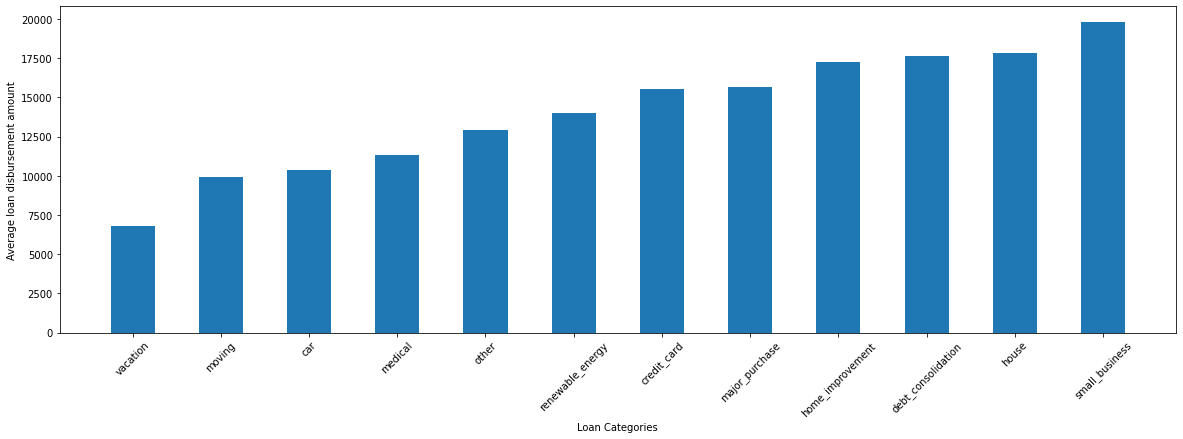

In [1201]:
loan_reason = loan_data.groupby(['loan_purpose']).mean().reset_index()
loan_reason.sort_values(by='loan_amount', inplace=True)
plt.figure(figsize = (20,6))
plt.bar(loan_reason['loan_purpose'], height= loan_reason['loan_amount'], width=0.5, bottom=None)
plt.xlabel('Loan Categories')
plt.ylabel('Average loan disbursement amount')
plt.xticks(loan_reason['loan_purpose'], rotation =45)
plt.show()

From the we can conclude that __"debt_consolidation"__, __"house"__ and __"small_business"__ are three major reason for loan. People borrowing loan for above 3 reasons should be targeted and given low interest rates to increase the business.

### 3. Proportions if different grade of loans

The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5.

Considering this statement, we assume that the loan risk will be graded lowest for__"A"__ and highest for __"G"__

reference article to help the labeliing of the pie chart -https://stackoverflow.com/questions/64411633/how-to-rotate-the-percentage-label-in-a-pie-chart-to-match-the-category-label-ro


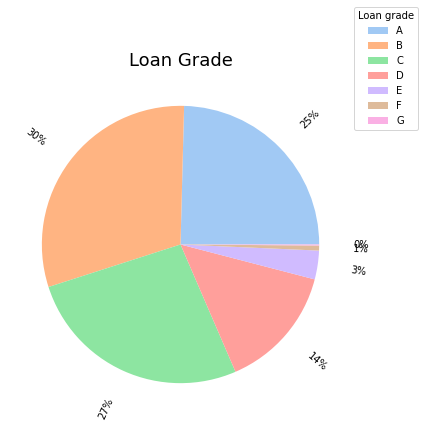

In [1204]:
# https://stackoverflow.com/questions/64411633/how-to-rotate-the-percentage-label-in-a-pie-chart-to-match-the-category-label-ro

loan_reason_1 = loan_data.groupby(['grade']).count().reset_index()
colors = sns.color_palette('pastel')[0:12]
#create pie chart
plt.figure(figsize = (20,6))
patches, labels, pct_texts = plt.pie(loan_reason_1['loan_amount'], colors = colors, autopct='%.0f%%',rotatelabels=True, pctdistance=1.3)
for label, pct_text in zip(labels, pct_texts):
      pct_text.set_rotation(label.get_rotation())
plt.title('Loan Grade', fontsize=18)
plt.legend(labels = loan_reason_1['grade'], bbox_to_anchor=(1.2, 1.2), title = "Loan grade")
plt.tight_layout()
plt.show()



Here we group the entries by the 'grade' category of loans and find the propotion of loans disbursed for each category.

This can give us an insight regarding the expected loan disbursement limit for different categories. From this we can conclude that the target audience comes three lower loan grades, __"A"__, __"B"__ and __"C"__

### 4. Grade categorization


In [ ]:
loan_grade = loan_data.groupby(['grade']).mean().reset_index()
loan_grade

## 5. Data Cleaning

After describing the data we have indentified the columns with missing values.


For cleaning the dataframe we will go column by column and analysis of each column will follow three strategies mentioned below - 


1. Missing value count being more than 60% -> Removing the column
2. Missing value count less than 60%-> Perform data imputation techniques based on distribution of columns and their correlation with other predictors

We will first start with splitting dataframe into train and test data to keep test data invisible to the model. We will apply all the tranformations and cleaning techniques of the train data to the test data

In [ ]:
X = loan_data.drop(columns=['interest_rate'])
y = loan_data['interest_rate']
loan_data_clean, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# List of missing values for the train data
loan_data_clean.isna().sum()

### 1) Missing value count being more than 70%
The columns 'annual_income_joint', 'verification_income_joint', 'debt_to_income_joint' and 'months_since_90d_late' have around 70% missing values. Imputing values in these columns based on the distibution of non null points might give unexpected values and affect the prediction of outcome. Hence we will remove these columns

Similarly the column 'num_accounts_120d_past_due' either comprises of null values or 0. The value 0 means that there no current accounts that are 120 days past due. Hence we remove this column as well.

We can also drop the columns 'loan_purpose', 'emp_title', 'state' as they have too many categoeries to be considered as factors. So we will remove these columns as well.

In [ ]:
loan_data_clean = loan_data_clean.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','emp_title','state','loan_purpose','num_accounts_120d_past_due','months_since_90d_late'])

X_test = X_test.drop(columns=['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','emp_title','state','loan_purpose','num_accounts_120d_past_due','months_since_90d_late'])

loan_data_clean.head()

### 2) Missing value being less than 60%

*emp_length* and *months_since_last_credit_inquiry*

In [ ]:
# correlation plot
corr_1 = loan_data_clean.corr()
corr_1[['emp_length','months_since_last_credit_inquiry']].T

The columns 'emp_length' and 'months_since_last_credit_inquiry' are not highly correlated to any other column. So we can go ahead with it imputing values with considering distributions of other columns. For imputation we will use 3 parameters - mean, median and mode

Employee experience can vary from 1 to a higher value of 60. Here all the employees with more than 10 years of experience are lables with the experience of 10 years. So, the mode is 10. Generally employees with higher experience are in the position to get settled. Since we are dealing approved loans we will go ahead with imputing the missing values with __"mode"__.

Similary for the column __"months_since_last_credit_inquiry"__ the distribution is skewed to the right.

Looking at the non normal distribution of the predictors and values of mean and median we can concluded that these values will affect the distribution of the predictor. 

Hence we will go ahead imputing the missing values with mode

In [ ]:
def mode_imputation(col_name):
  """Function to impute the missing values in a columns with mode"""
  para  = [loan_data_clean[col_name].mean(), loan_data_clean[col_name].median(),loan_data_clean[col_name].mode()[0]]
  print("Mean: ", para[0])
  print("Mean: ", para[1])
  print("Mean: ", para[2])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution before imputation")

  loan_data_clean[col_name] = loan_data_clean[col_name].fillna(loan_data_clean[col_name].mode()[0])
  # distribution plot before imputing the missing value
  sns.displot(loan_data_clean, x=col_name, kind="kde")
  plt.title("Distribution after imputation")
  plt.show()

In [ ]:
# mode imputation for emp_length
mode_imputation("emp_length")

# applying the same method to test data
X_test["emp_length"] = X_test['emp_length'].fillna(loan_data_clean['emp_length'].mode()[0])

In [ ]:
# mode imputation for months_since_last_credit_inquiry
mode_imputation("months_since_last_credit_inquiry")

# applying the same method to test data
X_test["months_since_last_credit_inquiry"] = X_test['months_since_last_credit_inquiry'].fillna(loan_data_clean['months_since_last_credit_inquiry'].mode()[0])

*months_since_last_delinq*

In [ ]:
# correlation plot
corr_months_since_last_delinq = loan_data_clean.corr()
corr_months_since_last_delinq = corr_months_since_last_delinq[['months_since_last_delinq']]
corr_months_since_last_delinq[abs(corr_months_since_last_delinq['months_since_last_delinq'])>0.5]

After plotting the correlation plot for the __"months_since_last_delinq"__ we observe that it is has a high negative correlation with __"delinq_2y"__, since more the Delinquencies, more is the frequnecy and less is the time between two deliquencies.

Thus, we will impute the missing values with a univariate approach. We will predict the __"months_since_last_delinq"__ column using the columns with which it is highly correlated. We will use the IterativeImputer package from sklearn


In [ ]:
# importing the pacakge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# initializing the imputer
impute_it = IterativeImputer()

# imputing the missing values with multivariate regression
regression_imputation = loan_data_clean[['delinq_2y','months_since_last_delinq']]
a = impute_it.fit_transform(regression_imputation)
loan_data_clean['months_since_last_delinq'] =np.round(a[:,1],2)

# confirming the count of missing values as 0
print("Missing value count for train data", loan_data_clean['months_since_last_delinq'].isna().sum())

#Now we apply the same to test data
# imputing the missing values with multivariate regression
regression_imputation_test = X_test[['delinq_2y','months_since_last_delinq']]
a_test = impute_it.fit_transform(regression_imputation_test)
X_test['months_since_last_delinq'] =np.round(a_test[:,1],2)

# confirming the count of missing values as 0
print("Missing value count for test data", X_test['months_since_last_delinq'].isna().sum())


*debt_to_income*

In [ ]:
corr_2 = loan_data_clean.corr()
corr_2[['debt_to_income']].T

The column __"debt_to_income"__  does not have high correlation with any other columns. 
Here the the data is right skewed so mean is out of question. Since this is a continuous variable and the mode frequency not being distinctly high with respect to other values we can go ahead with median imputation for this column

In [ ]:
# sns.displot(loan_data_clean, x="debt_to_income", kind="kde")
ax = sns.boxplot(x="debt_to_income",data=loan_data_clean, linewidth=2.5)
print("Mean : ", loan_data_clean['debt_to_income'].mean())
print("Median : ", loan_data_clean['debt_to_income'].median())
print("Mode : ", loan_data_clean['debt_to_income'].mode())

In [ ]:
loan_data_clean['debt_to_income'] = loan_data_clean['debt_to_income'].fillna(loan_data_clean['debt_to_income'].median())
print("The missing value count for train data", loan_data_clean['debt_to_income'].isna().sum())

#Applying same imputation to the test data
X_test['debt_to_income'] = X_test['debt_to_income'].fillna(X_test['debt_to_income'].median())
print("The missing value count for test data", X_test['debt_to_income'].isna().sum())


Now that we have removed all the missing values we will have to format the categorical variables

### 1. Formatting binary variables
*disbursement_method*

We can drop the binary categorical variable __"disbursement_method"__ as it is highly imbalanced. Approximately 93% of data belongs to the class __"Cash"__.

In [ ]:
loan_data_clean['disbursement_method'].value_counts()


*initial_listing_status*

We can drop the binary categorical variable __"initial_listing_status"__ as it is highly imbalanced. Approximately 82% of data belongs to the class __"whole"__.
Which means there are very few instance of __"fractional"__ which can contribute towards prediction. The dataset description does not precisely mention the use of this variable. So it is better to go ahead by disregarding this variable.

In [ ]:
loan_data_clean['initial_listing_status'].value_counts()

*application_type*

The column __"application_type"__ also has a disporportionate distribution. Moreover, we have already removed certain predictors pertaining to join appliation. Hence dropping this column. We can consider joint application in a separate analysis

In [ ]:
loan_data_clean['application_type'].value_counts()

In [ ]:
loan_data_clean = loan_data_clean.drop(columns=['initial_listing_status','disbursement_method','application_type'])

# applying the same formatting to test data
X_test = X_test.drop(columns=['initial_listing_status','disbursement_method','application_type'])


loan_data_clean.head()

### 2. Formatting variables with more than 2 categories
*homeownership*

The homeownership has 3 classes as mentioned below. However the risk of loan disbursement depends more on the fact that it is against a mortgage or not. Hence we can go ahead with combining the class __"OWN"__ and __"RENT"__ and __"NON_MORTGAGE"__. This also ensures that the class count is balanced.

In [ ]:
loan_data_clean['homeownership'].value_counts()

In [ ]:
loan_data_clean.replace("OWN", "NON_MORTGAGE", inplace =True)
loan_data_clean.replace("RENT", "NON_MORTGAGE",inplace =True)

# applying the same formatting to test data
X_test.replace("OWN", "NON_MORTGAGE", inplace =True)
X_test.replace("RENT", "NON_MORTGAGE",inplace =True)


loan_data_clean['homeownership'].value_counts()

In [ ]:
loan_data_clean['MORTGAGE'] = pd.get_dummies(loan_data_clean['homeownership'])['MORTGAGE']
loan_data_clean = loan_data_clean.drop(columns=['homeownership'])

# applying the same formatting to test data
X_test['MORTGAGE'] = pd.get_dummies(X_test['homeownership'])['MORTGAGE']
X_test = X_test.drop(columns=['homeownership'])


*verified_income*

This column has 3 caregories, but the distribution is not highly imbalanced. So we can make use on hot coding.

reference article - https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

def onehotencoding(data_1):
  """Function to perform one hot encoding on categorical data"""
  le = LabelEncoder()
  data_1['verified_income_enocded'] = le.fit_transform(data_1.verified_income)

  encoder = OneHotEncoder(categories = 'auto')
  X = encoder.fit_transform(
    data_1['verified_income_enocded'].values.reshape(-1,1)).toarray()
  dfonehot = pd.DataFrame(X, columns = ['isNotVerifed','isSourceVerified','isVerified'])

  # Concatenating the one hot encoded data to the original data frame
  data = pd.concat([data_1, dfonehot], axis =1)

  #droping encoding column
  data_1.drop(columns=['verified_income','verified_income_enocded'], inplace=True)


In [ ]:
# Applying onehotencoding to train data
onehotencoding(loan_data_clean)

# Applying onehotencoding to test data
onehotencoding(X_test)

*sub_grade*

reference link - https://www.lendingclub.com/foliofn/rateDetail.action

Quoted from the reference link

"The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each loan grade increment from A1 to G5."

Considering this we will drop the grade columns and rank the subgrade with __"A1"__ being the lowest and __"G5"__ being the highest.


In [ ]:
def rankinggrade(data):
  """"Ranking the grade categories in a column"""
  l = sorted(list(data.sub_grade.unique()))
  rank = {}
  for i in range(len(l)):
    rank[l[i]] =i+1
  data['sub_grade_rank'] = [rank[ele] for ele in data['sub_grade']]

  data.drop(columns=['grade','sub_grade'], inplace=True)

In [ ]:
# Applying ranking to train data
rankinggrade(loan_data_clean)

# Applying ranking to test data
rankinggrade(X_test)

*loan_status*

The column is highly dispropotionate with a high class imbalance within its categories. Majority of the columns are either paid or up to date on all outstanding payments.
This dataset does not have sufficient cases of the loan not being repayed or paid with a delay. Hence we can remove this column

In [ ]:
loan_data_clean = loan_data_clean.drop(columns=['loan_status'])

# Applyingt the same formatting to test data
X_test = X_test.drop(columns=['loan_status'])


### 3. Time series variables

*issue_month*

The issue months mentions the date of issue of the loan. We will drop this columns since the date is just 3 days of for 3 months

In [ ]:
loan_data_clean = loan_data_clean.drop(columns=['issue_month'])

# Applyingt the same formatting to test data
X_test = X_test.drop(columns=['issue_month'])


In [ ]:
loan_data_clean.info()

# 6. Data Mondelling

Now we will perform regression the data and check the model's performance on the unknown test data

We will make use of 2 types of models two perform the analysis

1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# creating an object of LinearRegression class
X_train  = loan_data_clean
LR = LinearRegression()

# fitting the training data
LR.fit(X_train,y_train)

In [ ]:
#prdicting the the interest values using the fitted model
y_prediction =  LR.predict(X_test)
y_prediction

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))